# Load data

In [1]:
import os
import pickle

with open(os.path.join('.', 'results', 'multigen_trial', 'results.pickle'), 'rb') as F:
    results = pickle.load(F)
    
raw_trace_file = os.path.join('.', 'results', 'raw_trace_training', 'results.pickle')
with open(raw_trace_file, 'rb') as F:
    raw_trace_results = pickle.load(F)
    
print(results.keys())
print(raw_trace_results.keys())
print([raw_trace_results[key].keys() for key in raw_trace_results.keys()])

dict_keys(['get_traces', 'get_saliency', 'get_confusion_matrix', 'gen_train_loss', 'disc_train_loss', 'disc_train_acc', 'gen_val_loss', 'disc_val_loss', 'disc_val_acc'])
dict_keys(['generator', 'discriminator'])
[dict_keys(['pretrain_train_loss', 'pretrain_val_loss', 'train_loss', 'val_loss', 'train_acc', 'val_acc']), dict_keys(['pretrain_train_loss', 'pretrain_val_loss', 'pretrain_train_acc', 'pretrain_val_acc', 'train_loss', 'val_loss', 'train_acc', 'val_acc', 'posttrain_train_loss', 'posttrain_val_loss', 'posttrain_train_acc', 'posttrain_val_acc'])]


# Plot performance over time during training in GAN and frozen-generator phases

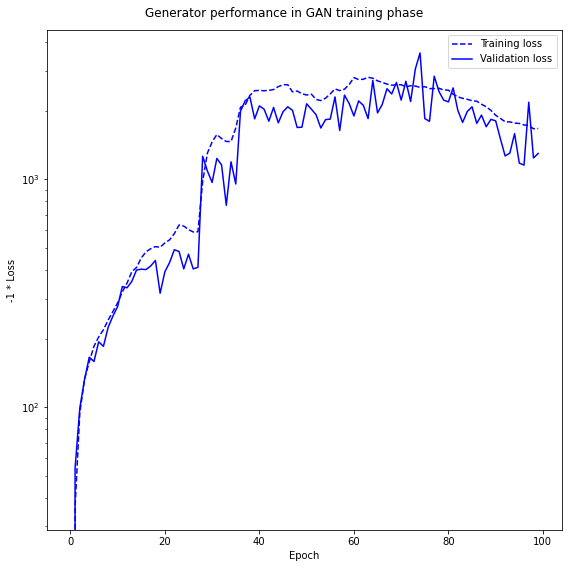

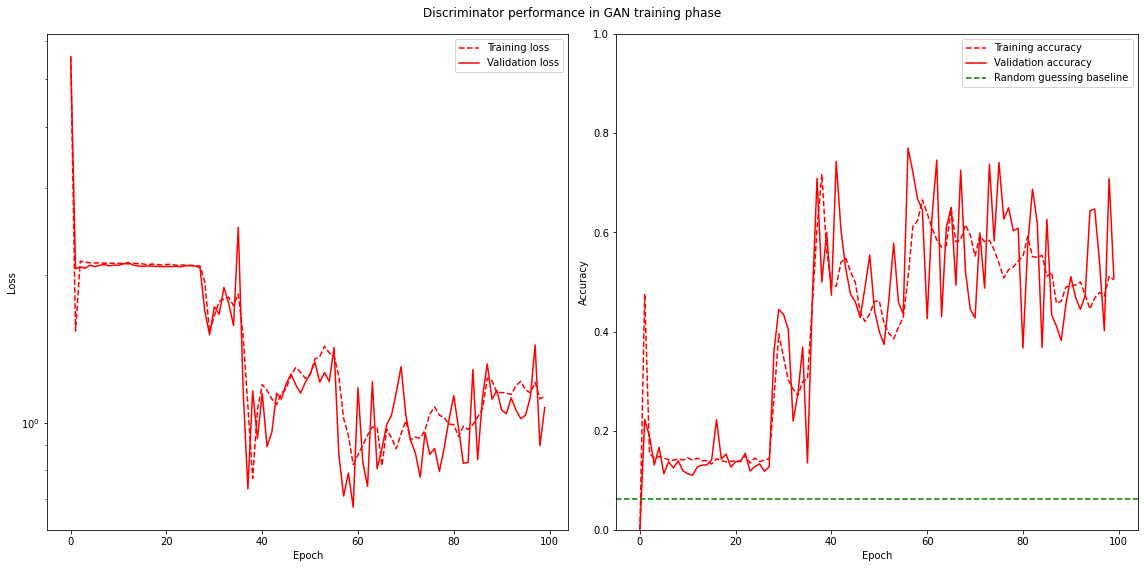

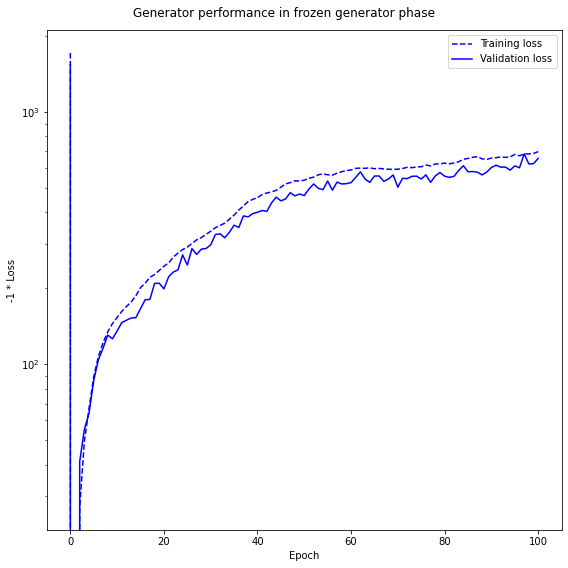

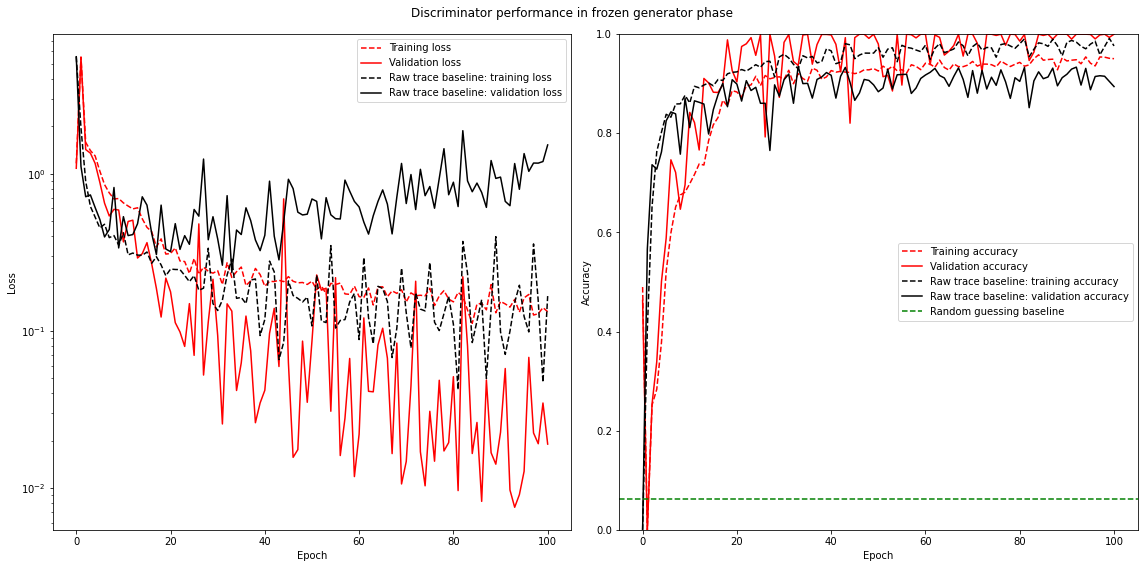

In [2]:
from matplotlib import pyplot as plt
import numpy as np

rt_train_loss = raw_trace_results['discriminator']['pretrain_train_loss']
rt_valid_loss = raw_trace_results['discriminator']['pretrain_val_loss']
rt_train_acc = raw_trace_results['discriminator']['pretrain_train_acc']
rt_valid_acc = raw_trace_results['discriminator']['pretrain_val_acc']

gen_train_loss = -np.array(results['gen_train_loss'][:-1])
gen_valid_loss = -np.array(results['gen_val_loss'][:-1])
disc_train_loss = results['disc_train_loss'][:-1]
disc_valid_loss = results['disc_val_loss'][:-1]
disc_train_acc = results['disc_train_acc'][:-1]
disc_valid_acc = results['disc_val_acc'][:-1]

(fig, ax) = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(gen_train_loss[:len(gen_train_loss)//2], linestyle='--', color='blue', label='Training loss')
ax.plot(gen_valid_loss[:len(gen_valid_loss)//2], linestyle='-', color='blue', label='Validation loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('-1 * Loss')
ax.set_yscale('log')
fig.suptitle('Generator performance in GAN training phase')
ax.legend()
plt.tight_layout()

(fig, ax) = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(disc_train_loss[:len(disc_train_loss)//2], linestyle='--', color='red', label='Training loss')
ax[0].plot(disc_valid_loss[:len(disc_valid_loss)//2], linestyle='-', color='red', label='Validation loss')
ax[1].plot(disc_train_acc[:len(disc_train_acc)//2], linestyle='--', color='red', label='Training accuracy')
ax[1].plot(disc_valid_acc[:len(disc_valid_acc)//2], linestyle='-', color='red', label='Validation accuracy')
ax[1].axhline(1/16, color='green', linestyle='--', label='Random guessing baseline')
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
ax[0].set_yscale('log')
ax[1].set_ylim(0, 1)
fig.suptitle('Discriminator performance in GAN training phase')
ax[0].legend()
ax[1].legend()
plt.tight_layout()

(fig, ax) = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(gen_train_loss[len(gen_train_loss)//2:], linestyle='--', color='blue', label='Training loss')
ax.plot(gen_valid_loss[len(gen_valid_loss)//2:], linestyle='-', color='blue', label='Validation loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('-1 * Loss')
ax.set_yscale('log')
fig.suptitle('Generator performance in frozen generator phase')
ax.legend()
plt.tight_layout()

(fig, ax) = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(disc_train_loss[len(disc_train_loss)//2:], linestyle='--', color='red', label='Training loss')
ax[0].plot(disc_valid_loss[len(disc_valid_loss)//2:], linestyle='-', color='red', label='Validation loss')
ax[0].plot(rt_train_loss, linestyle='--', color='black', label='Raw trace baseline: training loss')
ax[0].plot(rt_valid_loss, linestyle='-', color='black', label='Raw trace baseline: validation loss')
ax[1].plot(disc_train_acc[len(disc_train_acc)//2:], linestyle='--', color='red', label='Training accuracy')
ax[1].plot(disc_valid_acc[len(disc_valid_acc)//2:], linestyle='-', color='red', label='Validation accuracy')
ax[1].plot(rt_train_acc, linestyle='--', color='black', label='Raw trace baseline: training accuracy')
ax[1].plot(rt_valid_acc, linestyle='-', color='black', label='Raw trace baseline: validation accuracy')
ax[1].axhline(1/16, color='green', linestyle='--', label='Random guessing baseline')
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
ax[0].set_yscale('log')
ax[1].set_ylim(0, 1)
ax[0].legend()
ax[1].legend()
fig.suptitle('Discriminator performance in frozen generator phase')
plt.tight_layout()

# Plot traces, saliency, confusion matrices at various phases of training

Starting traces animation...
Starting saliency animation...
Starting confusion matrix animation...


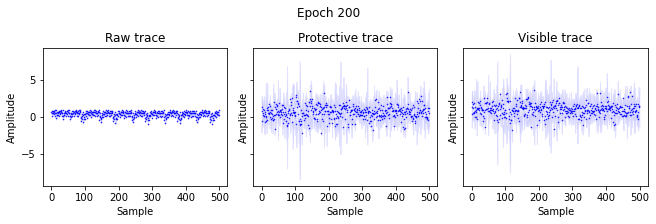

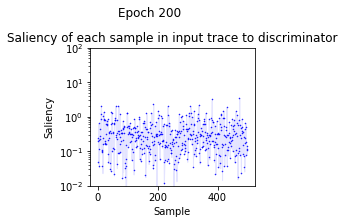

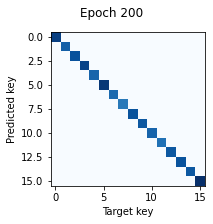

In [3]:
import numpy as np
from matplotlib.animation import FuncAnimation

traces = results['get_traces'][:-1]
saliencies = results['get_saliency'][:-1]
confusion_matrices = results['get_confusion_matrix'][:-1]

print('Starting traces animation...')
n_traces = len(traces)
(fig, ax) = plt.subplots(1, 3, sharey=True, figsize=(9, 3), constrained_layout=True)
def animate(t):
    trace_res = traces[t]
    fig.suptitle('Epoch {}'.format(t))
    for (trace_idx, (trace, title)) in enumerate(zip(trace_res, ('Raw trace', 'Protective trace', 'Visible trace'))):
        (min_trace, med_trace, max_trace) = trace
        ax[trace_idx].clear()
        ax[trace_idx].plot(med_trace, '.', markersize=1, color='blue')
        ax[trace_idx].fill_between(range(len(med_trace)), min_trace, max_trace, color='blue', alpha=.1)
        ax[trace_idx].set_xlabel('Sample')
        ax[trace_idx].set_ylabel('Amplitude')
        ax[trace_idx].set_title(title)
anim = FuncAnimation(fig, animate, interval=100, frames=n_traces)
anim.save(os.path.join('.', 'results', 'multigen_trial', 'traces.mp4'), dpi=200)

print('Starting saliency animation...')
n_saliencies = len(saliencies)
(fig, ax) = plt.subplots(1, 1, sharey=True, figsize=(3, 3), constrained_layout=True)
def animate(t):
    saliency_res = saliencies[t]
    fig.suptitle('Epoch {}'.format(t))
    (min_saliency, med_saliency, max_saliency) = saliency_res
    ax.clear()
    ax.plot(np.abs(med_saliency), '.', markersize=1, color='blue')
    ax.fill_between(range(len(med_saliency)), np.abs(min_saliency), np.abs(max_saliency), color='blue', alpha=.1)
    ax.set_xlabel('Sample')
    ax.set_ylabel('Saliency')
    ax.set_yscale('log')
    ax.set_ylim(1e-2, 1e2)
    ax.set_title('Saliency of each sample in input trace to discriminator')
anim = FuncAnimation(fig, animate, interval=100, frames=n_saliencies)
anim.save(os.path.join('.', 'results', 'multigen_trial', 'saliencies.mp4'), dpi=200)

print('Starting confusion matrix animation...')
n_confusion_matrices = len(confusion_matrices)
(fig, ax) = plt.subplots(1, 1, sharey=True, figsize=(3, 3), constrained_layout=True)
def animate(t):
    confusion_matrix_res = confusion_matrices[t]
    fig.suptitle('Epoch {}'.format(t))
    confusion_matrix = confusion_matrix_res[:16, :16]
    ax.clear()
    ax.imshow(confusion_matrix, cmap='Blues', vmin=0)
    ax.set_xlabel('Target key')
    ax.set_ylabel('Predicted key')
anim = FuncAnimation(fig, animate, interval=100, frames=n_confusion_matrices)
anim.save(os.path.join('.', 'results', 'multigen_trial', 'confusion_matrices.mp4'), dpi=200)